# Titanic Competition 

Given data is train.csv and test.csv
at "/Data/Titanic" locally

In [1]:
# read data
import pandas as pd

train_data=pd.read_csv('Data/Titanic/train.csv')
test_data=pd.read_csv('Data/Titanic/test.csv')


ModuleNotFoundError: No module named 'pandas'

In [2]:
# take a look at train data 
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#take a look at test data
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Visualization of data

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

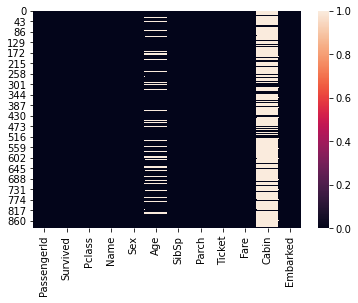

In [5]:
#first to take a visual of null data

sns.heatmap(train_data.isnull())

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


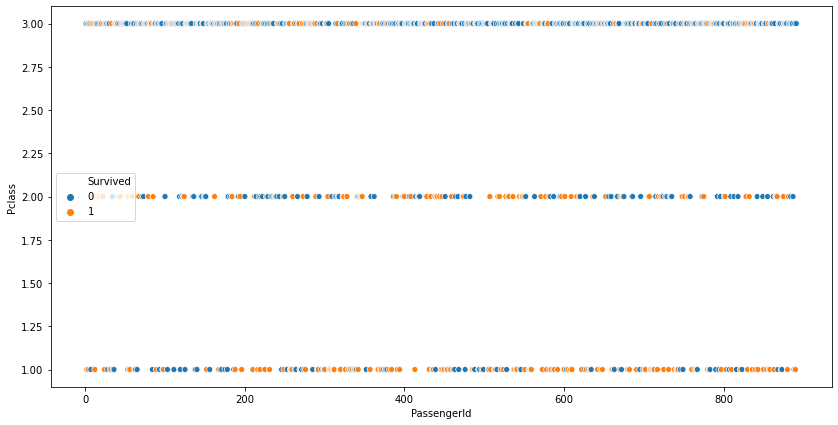

In [7]:
#view some relationships between the data
plt.figure(figsize=(14,7))
#plt.set_title("Pclass vs survived")
sns.scatterplot(y=train_data.Pclass,x=train_data.PassengerId,hue=train_data.Survived)
#as we likely to see people with lower Pclass is likely to survive

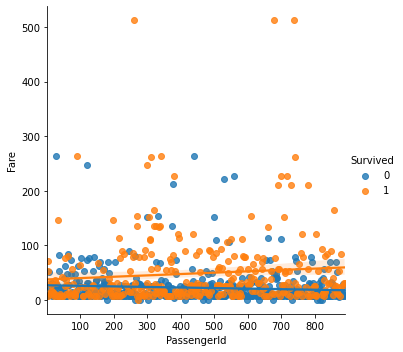

In [8]:
sns.lmplot(data=train_data,x='PassengerId',y='Fare',hue='Survived',)
#here the regression line says people who paid more price has slightly more chances to survived then the people who paid less

In [9]:
train_data[['Sex','Survived']].groupby('Sex',as_index=False).mean()
#females as more likely to survive than males 

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [10]:
train_data[['Embarked','Survived']].groupby('Embarked',as_index=False).mean()
# C are more likely to survie than Q and S

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


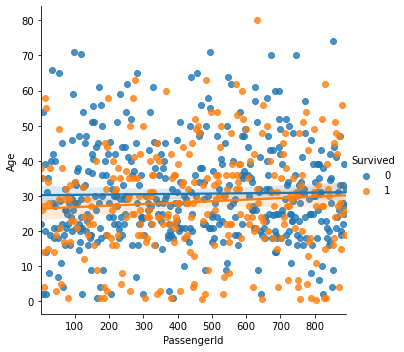

In [11]:
sns.lmplot(data=train_data,x='PassengerId',y='Age',hue='Survived',)
#by regression line we can see that the age shows a deflection in surviaval rate initially ,
#but later on it just equals to the regression line of those who lost their lives
#we can say age is also use to determined the survival rate

In [12]:
train_data[['Survived','SibSp']].groupby('SibSp',as_index=False).mean()
# clearly survival rate is well dependent on no of siblings board on the ship

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


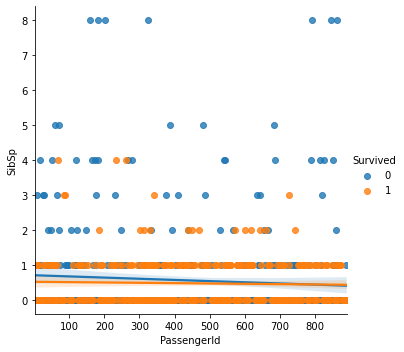

In [13]:
sns.lmplot(data=train_data,x='PassengerId',y='SibSp',hue='Survived',)
# we can say is someone has 1 or 2 sibling there is better chance of surviving

In [14]:
train_data[['Parch','Survived']].groupby('Parch').mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


# Cleaning of Data

In [15]:
cols_to_be_dropped=['Cabin','Ticket','Name']
#cabin is discarded as we dont have too much data in it .. nearly 80% of data is missing refilling the data can lead to mislead 
#accruacy of the model
# Ticket is discarded as the survival rate cant be dependent upon ticket no
# Name of a person is Discarded as it also cant be the deciding factor in the survival .

In [16]:
# dropped the column that decided to be dropped after the visualisation
train_data.drop(cols_to_be_dropped,axis=1,inplace=True)
test_data.drop(cols_to_be_dropped,axis=1,inplace=True)

In [17]:
# import the things needed for the data cleaning
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# find out the numerical columns in the data
y=train_data.Survived
X=train_data.drop('Survived',axis=1)

numerical_column=[col for col in X.columns if X[col].dtype in ['int64','float64']]

#find the categorical column in the data
categorical_column=list(set(X.columns)-set(numerical_column))
print("Numerical columns",numerical_column,'\n','Categorical columns',categorical_column)

Numerical columns ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'] 
 Categorical columns ['Embarked', 'Sex']


# Model

In [18]:
from sklearn.ensemble import RandomForestClassifier
# use to predict based upon the classes

from sklearn.model_selection import train_test_split
# use to split the data to validate

from sklearn.model_selection import cross_val_score
# check the validation score

In [19]:
y=train_data.Survived
#set the target

X=train_data.drop('Survived',axis=1)
#set the features of the model

train_X,valid_X,train_y,valid_y=train_test_split(X,y,random_state=42,test_size=0.33)
#split the data 

In [20]:
# Function to get the cross validation accuracy
def get_cross_val_score(n,X,y):
    #n is number of estimators that a model should take 
    # X is the features 
    # y is the set target
    
    # numerical preprocessors with strategy mean
    numerical_preprocess=SimpleImputer(strategy='mean')
    
    # categorical preprocessor { we can choose to use label encode on SEX but it cant be considered that what is more significiant
    # male or female , same apply for Embarked}
    # there is no data leakage {Target leakage and train test combination leakage}
    categorical_preprocess=Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),
                                      ('HotEncoder',OneHotEncoder())])
    
    # not use columntransformer to transform column and create parent preprocessor
    preprocessor=ColumnTransformer([('numerical',numerical_preprocess,numerical_column),
                            ('categorical',categorical_preprocess,categorical_column)])
    
    #finally create a pipeline that do the automated task for you
    global final_pipeline
    final_pipeline=Pipeline(steps=[('preprocessor',preprocessor),('model',RandomForestClassifier(n_estimators=n,random_state=0))])
    
    #return the cross validation score 
    # we only take 5 fold of the traninng data
    # and doing it in this way help us to make a better model in terms of accuracy 
    # increase and decrease the cross validation folds to maximize accuracy
    return cross_val_score(final_pipeline,X,y,cv=5,scoring='accuracy').mean()

In [21]:
# for checking what is the best number of n_estimators that can predict the best
#for i in range(400,500,10):
#    print(get_cross_val_score(i,train_X,train_y,valid_X,valid_y))

In [22]:
print("The cross validation score for 400 estimators is ",get_cross_val_score(400,X,y))
# get the cross validation score

The cross validation score for 400 estimators is  0.8048207896553888


# Predictions

In [24]:
#train the model on training set
final_pipeline.fit(X,y)
# make predictions using the pipeline
# on checking we found out that the model have 87% accuracy on test set 
test_preds=final_pipeline.predict(test_data)

#setting the data to submit the file
output = pd.DataFrame({'PassengerId': test_data.PassengerId,
                       'Survived': test_preds})
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [24]:
# making the submission
output.to_csv('submission.csv', index=False)

In [25]:
data=pd.read_csv('Data/Titanic/gender_submission.csv')

In [26]:

data.where(data.Survived==output.Survived)['Survived'].count()

338

In [27]:
data.count()

PassengerId    418
Survived       418
dtype: int64

In [28]:
324/418 *100

77.51196172248804